In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

In [2]:
from camera_calibrator import CameraCalibrator
from estimate_fundamental_matrix import EstimateFMBy8Points

In [3]:
def imshow(img, cmap=None, title=None):
    fig=plt.figure(figsize=(12, 10), dpi= 80)
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.imshow(img, cmap=cmap)
    

In [4]:
def images_show(images, cmap=None, title=None):
    size = len(images)
    fig, axs = plt.subplots(1, size, figsize=(18, 12), sharey=False)
    if title is not None:
        plt.title(title)
    for i in range(0, size):
        axs[i].axis('off')
        axs[i].imshow(images[i], cmap=cmap)
    


In [5]:
def run(image1, image2):
    images_show([cv.cvtColor(image1, cv.COLOR_BGR2RGB), cv.cvtColor(image2, cv.COLOR_BGR2RGB)], cmap='gray')
    
    estimate_fm = EstimateFMBy8Points(img1, img2)
    matches = estimate_fm.run_find_matching()
    
    matches_image = estimate_fm.draw_matches()
    imshow(cv.cvtColor(matches_image, cv.COLOR_BGR2RGB), title="matchces points", cmap='gray')
    
    F = estimate_fm.find_fundamental_matrix()
    print("Fundamental matrix F = ", F)
    
    lines1, lines2 = estimate_fm.find_epipolar_lines()
    
    image_lines1 = estimate_fm.draw_epilines_for_first_image()
    image_lines2 = estimate_fm.draw_epilines_for_second_image()
    
    
    images_show([cv.cvtColor(image_lines1, cv.COLOR_BGR2RGB), cv.cvtColor(image_lines2, cv.COLOR_BGR2RGB)],
                title="Two images with epipolar lines", cmap='gray')
    
    
    

Firstly, calibrate the camera

In [6]:
calibrate_imgs_dir = "images/calibration/elipse"
files = [f for f in listdir(calibrate_imgs_dir) if isfile(join(calibrate_imgs_dir, f))]
calibrate_imgs = files[1:] if files[0] == '.DS_Store' else files
calibrate_imgs = [f"{calibrate_imgs_dir}/{img}" for img in calibrate_imgs]
calibrator = CameraCalibrator()
calibrator.calibrate(calibrate_imgs)

(17, 44, 2)


Load and undistort images for finding fundamenatl matrices and epipolar lines

In [7]:
img1 = cv.imread("images/library1.png")
img2 = cv.imread("images/library2.png")
img3 = cv.imread("images/library3.pmg")

Undistor these images using recently calibrated camera

In [8]:
img1 = calibrator.undistort("images/library1.png")
img2 = calibrator.undistort("images/library2.png")
img3 = calibrator.undistort("images/library3.png")

### Pair 1, 2

Fundamental matrix F =  [[-7.80765866e-07 -2.02085576e-05  1.42978776e-02]
 [ 1.83574663e-05  1.29251036e-06  6.61336966e-04]
 [-1.41347600e-02 -3.11833265e-03  1.00000000e+00]]


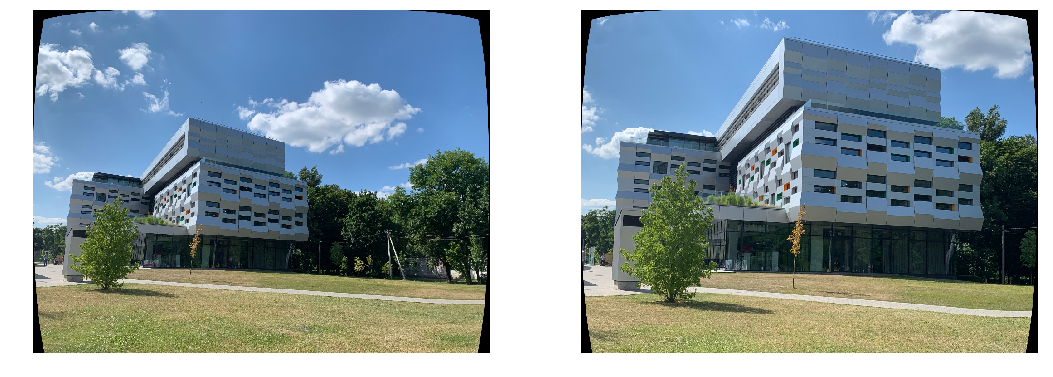

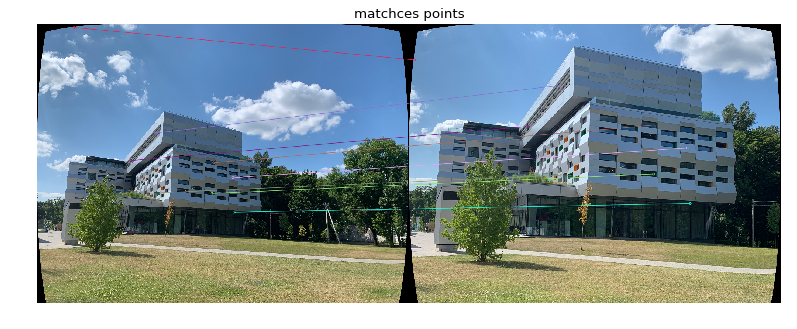

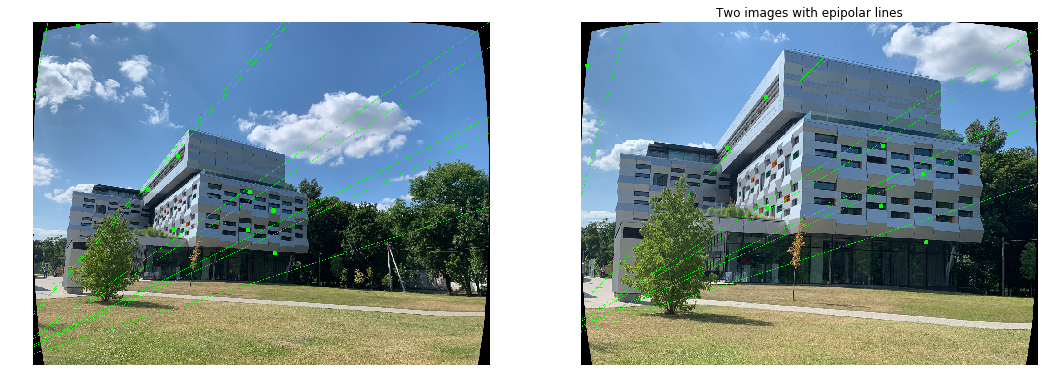

In [9]:
run(img1, img2)

### Pairt 1, 3

Fundamental matrix F =  [[-2.81536536e-07  7.80172981e-06 -1.00869558e-03]
 [-7.63525611e-06 -3.52126278e-07  3.54180187e-03]
 [-6.53480654e-04 -4.81013185e-03  1.00000000e+00]]


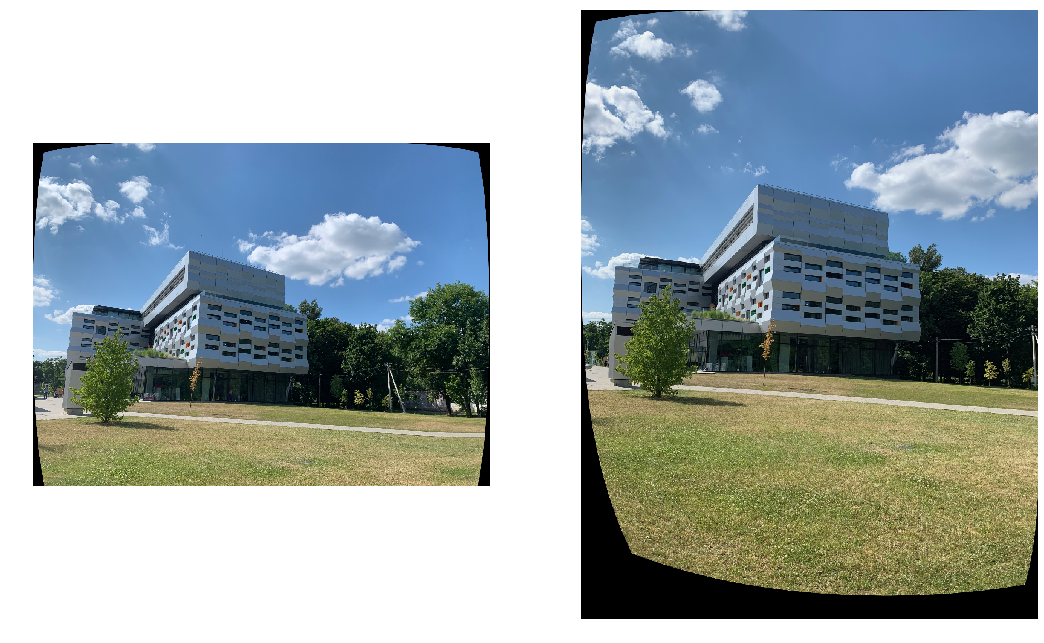

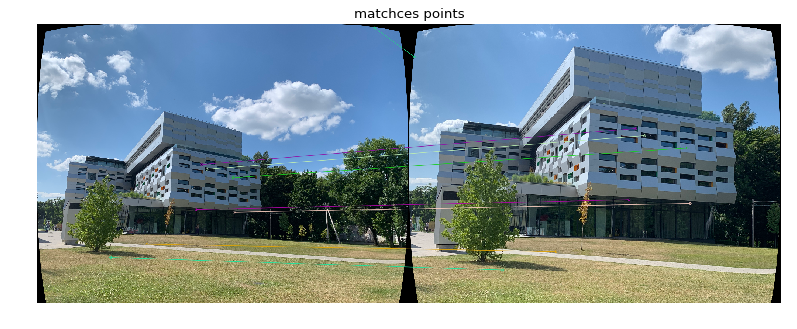

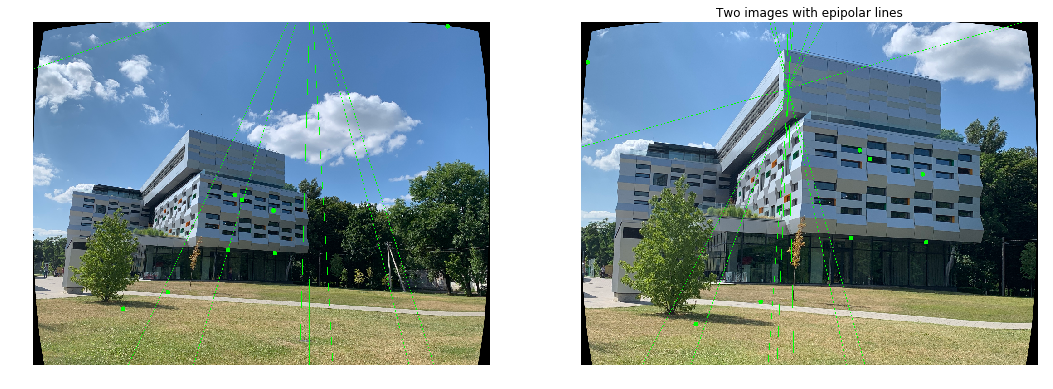

In [10]:
run(img1, img3)

### Pair 2, 3

Fundamental matrix F =  [[-3.93788545e-08 -3.30792488e-06  2.01916569e-03]
 [ 2.39498147e-06  7.68762138e-07  3.00653673e-03]
 [-1.57098038e-03 -5.23887443e-03  1.00000000e+00]]


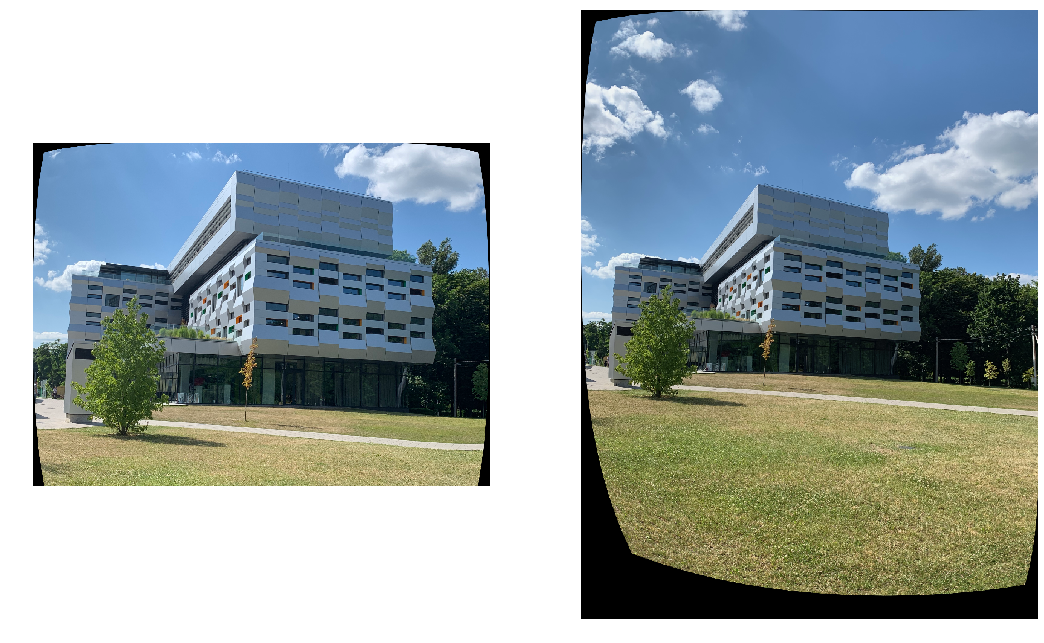

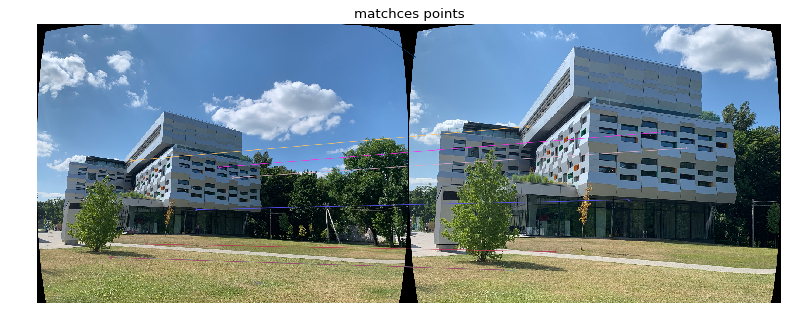

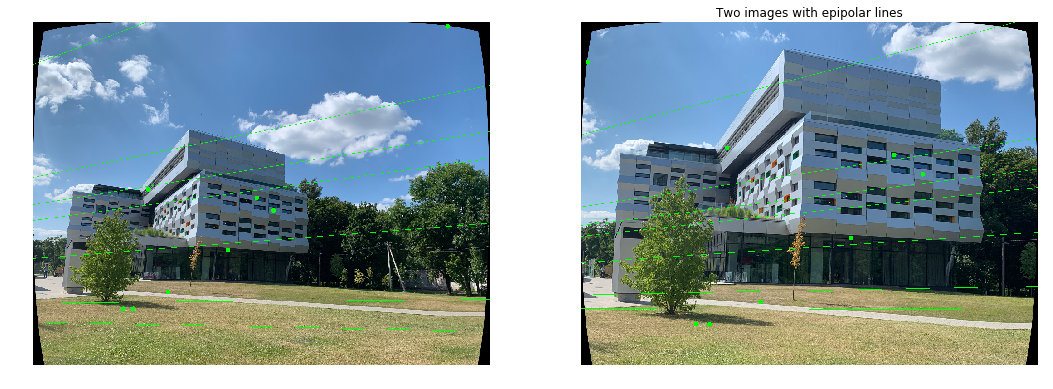

In [11]:
run(img2, img3)